vol : 1166
altitude : 350589187937078188831873920282244


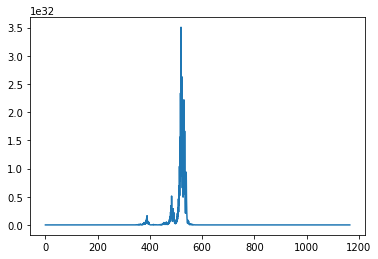

In [1]:
#compatible python > 3.10
import matplotlib.pyplot as plt

def is_even(num:int) -> bool:
    return num%2 == 0

class SyracuseNum():
    def __init__(self, num:int) -> None:
        assert num > 0 and isinstance(num, int)
        self._num = num

        self._vol_cache = None
        self._alt_cache = None
    
    @property
    def is_even(self) -> bool:
        return is_even(self._num)
    
    @staticmethod
    def next(num:int):
        assert num > 0
        if is_even(num):
            next = num // 2
        else:
            next = num *3 +1
        return next
    
    def graphique(self, ax=None, show=True):
        if not ax:
            _, ax = plt.subplots()
        self._graph_plot(ax)
        if show:
            plt.show()
    
    def _graph_plot(self, ax, *args, **kwargs):
        return ax.plot(range(len(self)), list(self), *args, **kwargs)
    
    def __iter__(self):
        self._iter_num = self._num
        self._iter_first = True
        self._iter_vol = 1
        self._iter_alt = self._num
        return self
    
    def __next__(self):
        if self._iter_first:
            self._iter_first = False
            return self._iter_num
        elif self._iter_num != 1:
            self._iter_num = SyracuseNum.next(self._iter_num)

            if not self._vol_cache:
                self._iter_vol += 1
            if not self._alt_cache:
                if self._iter_num > self._iter_alt:
                    self._iter_alt = self._iter_num

            return self._iter_num
        else:
            if not self._vol_cache:
                self._vol_cache = self._iter_vol
            if not self._alt_cache:
                self._alt_cache = self._iter_alt
            raise StopIteration
    
    def __len__(self):
        return self.vol

    @property
    def vol(self):
        if self._vol_cache:
            return self._vol_cache
        else:
            [_ for _ in self]
            return self._vol_cache
    
    @property
    def alt(self):
        if self._alt_cache:
            return self._alt_cache
        else:
            [_ for _ in self]
            return self._alt_cache


if __name__ == "__main__":

    s = SyracuseNum(10709980568908647)
    print(f"vol : {s.vol}")
    print(f"altitude : {s.alt}")
    s.graphique()

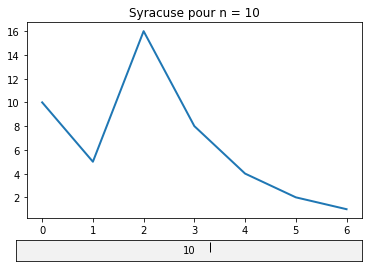

In [2]:
from matplotlib.widgets import TextBox

def app_syracuse(default_num, fig, ax, show=True):

    fig.subplots_adjust(bottom=0.2)

    graph, = SyracuseNum(default_num)._graph_plot(ax, lw=2)

    axbox = fig.add_axes([0.1, 0.05, 0.8, 0.075])
    text_box = TextBox(axbox, "", textalignment="center")

    def update(new_num):
        num = int(new_num)
        s = SyracuseNum(num)
        graph.set_xdata(range(len(s)))
        graph.set_ydata(list(s))
        ax.relim()
        ax.autoscale_view()
        ax.set_title(f"Syracuse pour n = {new_num}")
        text_box.set_val(str(new_num))
        plt.draw()
    
    text_box.on_submit(update)
    text_box.set_val(repr(default_num))  # Trigger `submit` with the initial string.

    if show:
        plt.show()
    else:
        return update

if __name__ == "__main__":
    fig, ax = plt.subplots()
    app_syracuse(10, fig, ax)

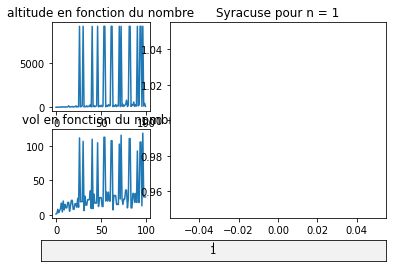

In [3]:
import matplotlib.pyplot as plt


def super_syracuse(num_max):

    vols = []
    alts = []

    for num in range(1, num_max+1):
        s = SyracuseNum(num)
        vols.append(s.vol)
        alts.append(s.alt)

    fig = plt.figure()

    ax1 = plt.subplot(231)
    ax1.plot(range(len(alts)), alts)
    ax1.set_title("altitude en fonction du nombre")

    ax2 = plt.subplot(234)
    ax2.plot(range(len(vols)), vols)
    ax2.set_title("vol en fonction du nombre")

    ax2 = plt.subplot(1, 3, (2, 3))
    update = app_syracuse(1, fig, ax2, show=False)
    ax2.set_title("Syracuse pour n = 1")

    def onclick(event):

        """
        print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
            ('double' if event.dblclick else 'single', event.button,
            event.x, event.y, event.xdata, event.ydata))
        """
        if (not event.dblclick) and event.button == 3:
            update(round(event.xdata))

    cid = fig.canvas.mpl_connect('button_press_event', onclick)

    plt.show()

if __name__ == "__main__":
    super_syracuse(100)